## <span style="font-family: Algerian; font-weight:bold;font-size:2em;color:Red; center"> Project on Neural Network:

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Green;">Contents:

[Data Description](#Ds)

[Objective](#O)

[Steps, Tasks and Solution](#sts)



<a id='the_destination'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Data Description
<a id='Ds'></a>
    <font color= darkblue>

## *** Street View Housing Number (SVHN) digit Recognition***


- Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. 

- In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides).

 
- SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.        
        
 </font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Objective
<a id='O'></a> 
    <font color= Blue> The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network and understand the basics of Image Classification
    </font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Steps, Tasks and Solutions
<a id='sts'></a>
    <font color=red>
1. [Import the necessary libraries](#I)
        
2. [Read the data from the h5py file and understand the train/test splits](#R)

        
3. [Reshape and Normalize the train and test features](#RN)
        
           
4. [One Hot encode the labels for train and test data](#OHE)
   
    
5. [Define the model architecture using TensorFlow with- ](#MA)
        
    * a. Flatten Layer 
        
    * b. Followed by Dense Layers with activation as ReLu 
         
    * c. Followed by output layer with activation as Softmax 
               
           
6. [Compile the model with loss as categorical cross-entropy and Adam optimizers. Use accuracy as the metric for evaluation](#Adam)
        
  
        
7. [Fit and evaluate the model. Print the loss and accuracy for the test data](#F&E)
                   

8. [Hyper Parameter Tuning to enhance the model accuracy](#HPT)
        
    * a. [Manual Mode of operation](#HPTMM) 
        
    * b. [Hyper parameter tuning using RandomSearch CV](#HPTRSCV) 
         
    * c. [Observations on accurices](#OO) 
                 
        
9. [Summary](#C)
     
</font>
    <a id='the_destination'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 1. Import the necessary libraries
<a id='I'></a>
   

In [2]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 3.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78937 sha256=d069e3582da5f5b8d0820ec361d716fd43da969c4cb5113fbf8d067c0fc656ef
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=8e435c9377aadcabe4f24b5468fef8b7c63810390e4cda33802203c24e46b9fe
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 

# For HyperParameter Tuning
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

print(tensorflow.__version__)

2.3.0


In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 2. Read the data from the h5py file and understand the train/test splits
<a id='R'></a>
   

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import h5py

# Open the file as readonly
prj = h5py.File('/content/gdrive/MyDrive/NN_project/SVHN_single_grey1.h5', 'r')

prj.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [7]:
# Load the training, test and validation set
X_train = prj['X_train'][:]
y_train = prj['y_train'][:]
X_test = prj['X_test'][:]
y_test = prj['y_test'][:]

- X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents the number they actually are.

In [8]:
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [9]:
y_train[:1]

array([2], dtype=uint8)

In [10]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 3. Visualize, Reshape and Normalize the train and test features
<a id='RN'></a>
   

Label: 1


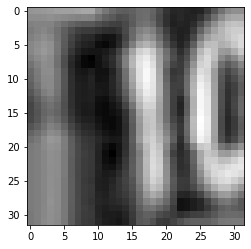

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Label: {}".format(y_train[16000]))
plt.imshow(X_train[16000], cmap='gray');

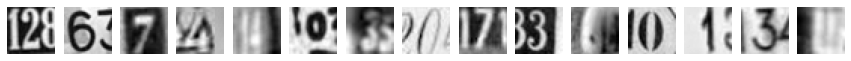

label for each of the above image: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [12]:
# Visualizing 1st 11 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (15,1))
for i in range (15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:15]))

Label: 2


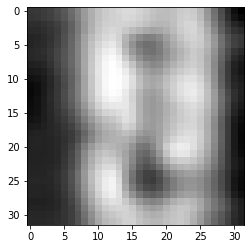

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.figure(figsize = (15,5))
print("Label: {}".format(y_train[6000]))
plt.imshow(X_train[6000], cmap='gray');

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


42,000 train data each of size 32 x 32 and 42,000 corrosponding y_test data.

Similarly 18,000 test data each of size 32 x 32

### Reshape the data

- Our network (fully connected layer) will take data in vector form not in matrix form, so reshaping the data helps us to feed our network as per requirement.
- This reshape feature will make each image as single row or a vector and feed it to network.
- i.e. reshape() method gives a new shape to an array without changing its data.

In [15]:
print(X_train.shape)
print(X_test.shape)

X_train = X_train.reshape(X_train.shape[0], 1024,1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)


print('Resized Training Set', X_train.shape, y_train.shape)
print('Resized Test Set', X_test.shape, y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
Resized Training Set (42000, 1024, 1) (42000,)
Resized Test Set (18000, 1024, 1) (18000,)


### Normalize data

- We must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- So we will normalize features from 0-255 to 0-1.
- Here, we'll be normalizing X_train and X_test

In [16]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 4. One Hot encode the labels for train and test data
<a id='OHE'></a>
   

- Converts class vectors to (integers) to binary class matrix
- convert y_train adn y_test
- Number of classes: 10 
- This is done to use categorical_crossentropy as loss

In [17]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no. of classes
num_classes = y_test.shape[1]
print('Shape of y_train:', y_train.shape)
print('The number of classes in this dataset are:', num_classes)
print(y_train[10])


Shape of y_train: (42000, 10)
The number of classes in this dataset are: 10
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


- Now ahape of y_train is (42000, 10) instead of 42000, this is because we have 10 labels now.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 5. Define the model architecture using TensorFlow with-
<a id='MA'></a>

#### Initializing a sequential model
- Define a sequential model
- Flatten the data
  - add a Flatten layer
  - Flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- Add 2 Dense layers
  - Number of neurons in first layer: 128
  - Activation layer in first layer is relu
  - Number of neurons in last layer: number of classes
  - Activation function in last layers is softmax

- We can experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes.

In [18]:
from tensorflow.keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 6. Compile the model with loss as categorical cross-entropy and Adam optimizers. Use accuracy as the metric for evaluation
<a id='Adam'></a>

- Compiling our model
  - loss: 'categorical_crossentropy'
  - metrics: 'accuracy'
  - optimizers: 'adam'
- Fitting the model to train data and validate the data
  - given train data: training features and labels
  - batch size: 32
  - epochs: 10
  - validation data: test features and labels

In [19]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'Adam')

model.fit(x = X_train, y= y_train, batch_size=32, epochs= 10, validation_data = (X_test, y_test))

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2967 - accuracy: 0.1107 - val_loss: 2.2502 - val_accuracy: 0.1287
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.1671 - accuracy: 0.1674 - val_loss: 2.0689 - val_accuracy: 0.2292
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.0427 - accuracy: 0.2245 - val_loss: 2.0184 - val_accuracy: 0.2338
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.0071 - accuracy: 0.2367 - val_loss: 1.9980 - val_accuracy: 0.2453
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 1.9914 - accuracy: 0.2431 - val_loss: 1.9901 - val_accuracy: 0.2462
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 1.9843 - accuracy: 0.2455 - val_loss: 1.9828 - val_accuracy: 0.2538
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 1.9772 - accuracy: 0.2481 - val_loss: 1.9794 - val_accuracy:

#### Initializing a sequential model
- Define a sequential model
- Flatten the data
  - add a Flatten layer
  - Flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- Add 5 Dense layers
  - Number of neurons in first layer: 256
  - Activation layer in first layer is relu
  - Number of neurons in second layer: 128
  - Activation layer in first layer is relu
  - Number of neurons in third layer: 64
  - Activation layer in third layer is relu
  - Number of neurons in fourth layer: 32
  - Activation layer in fourth layer is relu
  - Number of neurons in last layer: number of classes
  - Activation function in last layers is softmax

- We can experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import regularizers, optimizers

def nn_model():
    # create model
    
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, input_shape = (1024,), activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [21]:
model = nn_model()

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 7. Fit and evaluate the model. Print the loss and accuracy for the test data
<a id='F&E'></a>

- Compiling our model
  - loss: 'categorical_crossentropy'
  - metrics: 'accuracy'
  - optimizers: 'adam', with learning rate: 1e-3
- Fitting the model to train data and validate the data
  - given train data: training features and labels
  - batch size: 300
  - epochs: 100
  - verbose = 2
  - validation data: test features and labels

In [22]:
opt = optimizers.Adam(lr = 1e-3)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'] )
# Loss function = Categorical cross entropy

In [23]:
model_fit = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size= 300, verbose=2)

Epoch 1/100
140/140 - 2s - loss: 2.2953 - accuracy: 0.1163 - val_loss: 2.2345 - val_accuracy: 0.1733
Epoch 2/100
140/140 - 2s - loss: 2.0461 - accuracy: 0.2552 - val_loss: 1.7281 - val_accuracy: 0.4023
Epoch 3/100
140/140 - 2s - loss: 1.5939 - accuracy: 0.4503 - val_loss: 1.4834 - val_accuracy: 0.4836
Epoch 4/100
140/140 - 2s - loss: 1.3845 - accuracy: 0.5346 - val_loss: 1.2758 - val_accuracy: 0.5817
Epoch 5/100
140/140 - 2s - loss: 1.2550 - accuracy: 0.5920 - val_loss: 1.2067 - val_accuracy: 0.6116
Epoch 6/100
140/140 - 2s - loss: 1.1671 - accuracy: 0.6256 - val_loss: 1.0992 - val_accuracy: 0.6499
Epoch 7/100
140/140 - 2s - loss: 1.0998 - accuracy: 0.6500 - val_loss: 1.0998 - val_accuracy: 0.6495
Epoch 8/100
140/140 - 2s - loss: 1.0398 - accuracy: 0.6736 - val_loss: 1.0316 - val_accuracy: 0.6824
Epoch 9/100
140/140 - 2s - loss: 0.9920 - accuracy: 0.6918 - val_loss: 0.9601 - val_accuracy: 0.7097
Epoch 10/100
140/140 - 2s - loss: 0.9522 - accuracy: 0.7044 - val_loss: 0.9676 - val_accura

Conclusion and Interpretation

In [24]:
# Final Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

Loss: 0.6942762136459351
Accuracy: 0.824833333492279


Text(0.5, 1.0, 'Training and validation loss')

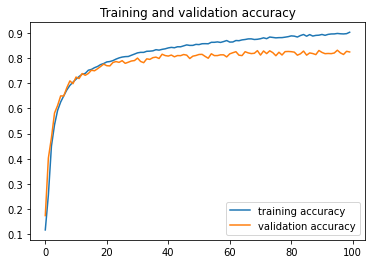

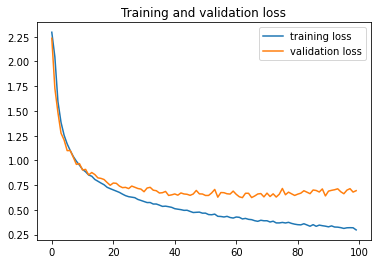

In [25]:
accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(accuracy)) # Get number of epoches

plt.plot (epochs, accuracy, label = 'training accuracy')
plt.plot (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot (epochs, loss, label = 'training loss')
plt.plot (epochs, val_loss, label = 'validation loss')
plt.legend (loc = 'upper right')
plt.title ('Training and validation loss')

### Conclusion
- Here we have fabricated a model to predict 10 labels i.e. digits from 0 to 9.

- The fully connected neural network has a flatten layer, followed by dense layers and a output layer with softmax.
- The final accuracy of the model has come out to be 82.23% with a validation loss of 0.684.
- Accuracy and loss of both validation and test data have been ploted.
- It can be interpreted that, at a certain point, the train accuracy starts to deviate and increase while the validation accuracy starts to flatten or decrease.
- Simultaniously, the validation loss starts to increase and the difference between the training & validation loss also shooting up. this indicates the overfitting of the model.

- Further, we can try to enhance the model perfomance by hyperparameter tuning method. (Executed below)

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 8. Hyper Parameter Tuning to enhance the model accuracy
<a id='HPT'></a>

Requirement of Hyperparameter Tuning is to decide 

*   How many Number of Hidden layers we should have ?
*   How many Number of Neurons in each hidden layer we should have ?
*   What should be the Learning Rate ?





## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 8.a. Manual Mode of operation
<a id='HPTMM'></a>

- Let's write a function to run it multiple time
  - It has three dense layers, out of which one is output layer and rest all are hidden layers.
  - Output layer has softmax as activation function and also has a kernel regularizer (l2).
  - Rest of the things are same as above

### Model-1

In [26]:

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    
        
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    adam = optimizers.Adam(lr=learning_rate, decay=1e-6)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
    # model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    model.fit(X_train, y_train, validation_data = (X_test, y_test),  batch_size= 300, verbose=2)

    # return model

- Let's check the loss is reasonable or not with respect to accuracy..
- Disable the regularisation (Lambda = 0)

In [27]:
lr = 0.00001
Lambda = 0
# iterations = 1
train_and_test_loop(1, lr, Lambda)

140/140 - 2s - loss: 2.3066 - accuracy: 0.1051 - val_loss: 2.2977 - val_accuracy: 0.1159


- The loss here is almost around 2.2 to 2.3 and the corrosponding accuracy is around 10% to 11%.
- So, loss seems to be reasonable and it make sense for an untrained network.
- Since we have 10 classes in our output, the model is correctly predicting 1 upon 10 times i.e., 0.1% approximately as it is untrained.

- Now, let's introduce Lambda (Regularisation) term, and what it does to our loss function...

In [28]:
lr = 0.00001
Lambda = 1e3
iterations = 10
train_and_test_loop(iterations, lr, Lambda)

140/140 - 2s - loss: 18954.3711 - accuracy: 0.1102 - val_loss: 18687.8105 - val_accuracy: 0.1131


- Loss went up after adding regularisation term. However, accuracy remained almost same..

- Let's now overfit to a small subset of our dataset, in this case we will be taking 20 images to ensure our model architecture is good enough.

In [29]:
X_train_subset = X_train[0:20]

In [30]:
y_train_subset = y_train[0:20]

In [31]:
X_train1 = X_train_subset

In [32]:
y_train1 = y_train_subset

In [33]:
X_train1.shape

(20, 1024, 1)

In [34]:
y_train1.shape

(20, 10)

### Model-11

In [35]:

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    
        
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    adam = optimizers.Adam(lr=learning_rate, decay=1e-6)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
   
    model.fit(X_train1, y_train1, validation_data = (X_test, y_test),  batch_size= 300, verbose=2)


In [36]:
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

1/1 - 0s - loss: 2.5934 - accuracy: 0.0000e+00 - val_loss: 2.5241 - val_accuracy: 0.1000


- loss has decreased, however, the model is now in ovrefitting condition.
- Now let's take the model with original dataset and tune the parameters. 

In [37]:
 model.fit(X_train, y_train, validation_data = (X_test, y_test),  batch_size= 300, verbose=2)

140/140 - 2s - loss: 0.3124 - accuracy: 0.9006 - val_loss: 0.6837 - val_accuracy: 0.8252


- Let's tune with small regularisation and find learning rate to bring down the loss.

In [38]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

1/1 - 0s - loss: 2.3905 - accuracy: 0.0500 - val_loss: 2.3730 - val_accuracy: 0.0949


- No change in loss, may be due to low learning.
- Let's try with a larger learning rate.

In [39]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

1/1 - 0s - loss: 2.5880 - accuracy: 0.0000e+00 - val_loss: 1507802958716038227908850876416.0000 - val_accuracy: 0.1008


- Training loss is increasing, but validation loss is exploding, may be due to very high learning rate.
- Cost is very high means high learning rate.
- Let's try with learning rate value of 1e4

In [40]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

1/1 - 0s - loss: 2.3694 - accuracy: 0.1500 - val_loss: 2182194955210981376.0000 - val_accuracy: 0.1008


- Loss explosion still persists.
- we will decrease the no. of iterations and keep learning rate as 1e3 

In [41]:
lr = 1e3
Lambda = 1e-7
train_and_test_loop(50, lr, Lambda)

1/1 - 0s - loss: 2.1641 - accuracy: 0.1500 - val_loss: 2037394509398016.0000 - val_accuracy: 0.1008


- No improvement in accuracy and still the problem of loss explosion exists.
- The rough range of learning rate we should cross validate is somewhere between [1e3 to 1e-7]
- So we will go for Cross validation method.

### Model-2

- Below model gives the consolidated accuracy instead of accuracy at each epoch .
- At the last part, the 'model.evaluate' line is the only difference from model-1 or model-11 

In [42]:
def train_test_loop(iterations, lr, Lmabda, verb = True):

  # hyperparameters

  iterations = iterations
  learning_rate = lr
  hidden_nodes = 256
  output_nodes = 10

  model = Sequential()
  model.add(Flatten())
  model.add(Dense(hidden_nodes, input_shape = (1024,), activation = 'relu'))
  model.add(Dense(hidden_nodes, activation = 'relu'))
  model.add(Dense(output_nodes, activation = 'softmax', kernel_regularizer = regularizers.l2(Lambda)))

  opti = optimizers.Adam(lr = learning_rate, decay = 1e-6)
  # Compile model

  model.compile(loss='categorical_crossentropy', optimizer = opti, metrics = ['accuracy'])

  # Fit the model

  model.fit(X_train, y_train, epochs = iterations, batch_size=1000, verbose=1)

  score = model.evaluate(X_train, y_train, verbose = 0)

  return score

In [43]:
lr = 0.00001
Lambda = 1e-7
# iterations = 1
train_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 33ms/step - loss: 2.3179 - accuracy: 0.0965


[2.3030200004577637, 0.10109523683786392]

In [44]:
lr = 1e3
Lambda = 1e-7
train_and_test_loop(50, lr, Lambda)

1/1 - 0s - loss: 2.2655 - accuracy: 0.2500 - val_loss: 2177306424508416.0000 - val_accuracy: 0.1008


- The result is almost same as above model.
- The validation loss is exploding and accuracy is damn low, means the model is not learning anyting.

> Let's try Hyperparameter tuning techniques by using RandomSearchCV

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 8.b. Hyper parameter tuning using RandomSearch CV
<a id='HPTRSCV'></a>

In [45]:
# Let's define a custum function with a sequential model
def build_model(hp): # hp is the hyperparameter
  model = keras.Sequential() 
  model.add(Flatten())  
  for i in range(hp.Int('num_layers', 2, 20)): # minimum number of hidden layers is 2 and maximum is 20,
      
      model.add(layers.Dense(units=hp.Int('units_' +str(i), # dense function is used to creat neurons
                                        min_value =32, # Minimum number of neurons
                                        max_value = 512, # Maximum number of neurons
                                        step=32), # 
                           activation = 'relu')) # activation layer considered here is relu
      model.add(layers.Dense(num_classes, activation = 'softmax')) # output dense layer with 10 number of labels with activation function is softmax
      model.compile(optimizer=keras.optimizers.Adam( # adam optimizer is considered
              hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), # learning_rate a hyperparameter with three values
            # hp.Choice helps to select one out of three given options
            # hp.Int helpes to try with different values with a single learning rate
              loss = 'categorical_crossentropy', # loss function for classifiation 
              metrics=['accuracy']) # metrics for measurement of model performance is accuracy
      return model

In [46]:
tuner = RandomSearch( # imported from keras tuner
    build_model, # model building is my 1st parameter
    objective = 'val_accuracy', # 
    max_trials=5, # total number trials
    executions_per_trial =3, # number of executions in each trials
    # so total number of executions/ itterations w.r.t trials will be 5*3=15  
    directory='my_dir', # use to store each training weights when process is happening
    project_name='SVHN') # weights saved in this project

In [47]:
# Gives what are the searches we are executing
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [48]:
# tuner.search(X_train, y_train,
            #  epochs = 5,
            #  validation_data = (X_test, y_test))

tuner.search(X_train, y_train,
             epochs=50,
             validation_data = (X_test, y_test))

Trial 5 Complete [00h 14m 53s]
val_accuracy: 0.441481480995814

Best val_accuracy So Far: 0.8305740753809611
Total elapsed time: 00h 59m 11s
INFO:tensorflow:Oracle triggered exit


In [49]:
tuner.results_summary()

Results summary
Results in my_dir/SVHN
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 7
units_0: 512
learning_rate: 0.0001
Score: 0.8305740753809611
Trial summary
Hyperparameters:
num_layers: 12
units_0: 384
learning_rate: 0.001
Score: 0.441481480995814
Trial summary
Hyperparameters:
num_layers: 14
units_0: 64
learning_rate: 0.001
Score: 0.16753703355789185
Trial summary
Hyperparameters:
num_layers: 8
units_0: 224
learning_rate: 0.01
Score: 0.10177777707576752
Trial summary
Hyperparameters:
num_layers: 4
units_0: 192
learning_rate: 0.01
Score: 0.10177777707576752


#### Comments:
- After, adopting Random Search CV for hyperparameter tuning the accuracy given by the model is 83.05%
- This is the best accuracy among 5 tials.
- The corrosponding Hyperparameters are 7 Hidden layers, with 512 number of neurons and 0.0001 as learning rate value.


#### Initializing a sequential model
- Define a sequential model in such a manner that number layers should be 7 and total number of neurons should be 512 as per the result given by Random Search CV.
- Flatten the data
  - add a Flatten layer
  - Flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- Add 7 Dense layers
  - Number of neurons in first layer: 256
  - Activation layer in first layer is relu
  - Number of neurons in second layer: 128
  - Activation layer in first layer is relu
  - Number of neurons in third layer: 64
  - Activation layer in third layer is relu
  - Number of neurons in fourth layer: 32
  - Activation layer in fourth layer is relu
  - Number of neurons in fifth & sixth layer: 16
  - Activation layer in fifth & sixth layer is relu
  - Number of neurons in last layer: number of classes (here 10)
  - Activation function in last layers is softmax

- We can experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes.

In [50]:
def final_model():
    # create model
    
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, input_shape = (1024,), activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [56]:
opt = optimizers.Adam(lr = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'] )
# Loss function = Categorical cross entropy

In [57]:
model_fit = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size= 300, verbose=2)

Epoch 1/100
140/140 - 2s - loss: 0.1049 - accuracy: 0.9694 - val_loss: 0.9066 - val_accuracy: 0.8314
Epoch 2/100
140/140 - 2s - loss: 0.0925 - accuracy: 0.9746 - val_loss: 0.9196 - val_accuracy: 0.8319
Epoch 3/100
140/140 - 2s - loss: 0.0898 - accuracy: 0.9754 - val_loss: 0.9195 - val_accuracy: 0.8326
Epoch 4/100
140/140 - 2s - loss: 0.0884 - accuracy: 0.9759 - val_loss: 0.9238 - val_accuracy: 0.8318
Epoch 5/100
140/140 - 2s - loss: 0.0872 - accuracy: 0.9764 - val_loss: 0.9310 - val_accuracy: 0.8331
Epoch 6/100
140/140 - 2s - loss: 0.0855 - accuracy: 0.9770 - val_loss: 0.9373 - val_accuracy: 0.8312
Epoch 7/100
140/140 - 2s - loss: 0.0845 - accuracy: 0.9771 - val_loss: 0.9437 - val_accuracy: 0.8321
Epoch 8/100
140/140 - 2s - loss: 0.0845 - accuracy: 0.9771 - val_loss: 0.9455 - val_accuracy: 0.8305
Epoch 9/100
140/140 - 2s - loss: 0.0830 - accuracy: 0.9783 - val_loss: 0.9577 - val_accuracy: 0.8313
Epoch 10/100
140/140 - 2s - loss: 0.0823 - accuracy: 0.9784 - val_loss: 0.9515 - val_accura

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 8.c. Observations on accuracy
<a id='OO'></a>

In [58]:
# Final Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

Loss: 1.2583849430084229
Accuracy: 0.8256111145019531


Text(0.5, 1.0, 'Training and validation loss')

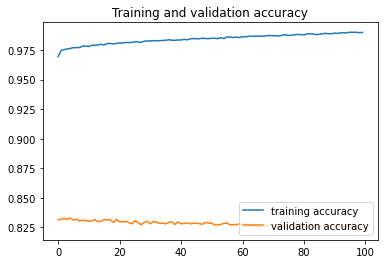

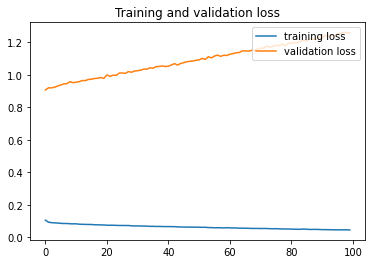

In [59]:
accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(accuracy)) # Get number of epoches

plt.plot (epochs, accuracy, label = 'training accuracy')
plt.plot (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot (epochs, loss, label = 'training loss')
plt.plot (epochs, val_loss, label = 'validation loss')
plt.legend (loc = 'upper right')
plt.title ('Training and validation loss')

- It can be observed from the above accuracy plot that, the training accuracy is above 95% and validation accuracy is almost 82.5%. The training accuracy started at 96% and validation accuracy started at 82.2%. 
- And, the the traing loss is very low it is below 0.2, however, the validation loss is more, and with respect to training loss it is increasing after some itteration. 
- The model gives a good result, however, after some itteration it is overfitting.
So, we have to prevent the model from overfitting. This is clearly a research probelm, which is to be explored by using CNN.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 9. Summary
<a id='C'></a>

- The model which has 42000 training samples and 18000 testing samples.
- All the images are of size 32 x 32.
- The model architecture was built with a flatten layer, some dense layers and an output layer.
- After reshaping and normalizing the data points (test and train), one-hot encoding has been performed.
- The Dense layers are integrated with ReLu activation and softmax activation has been used in Output layer.
- After, building the architecture, the accuracy of the model came around 82%. However, after few itterations the test accuracy remains same with an increasing of loss.
- This shows that the model is overfitting after a few epochs.
- So, to enhance the accuracy, we have introduced tuning of hyperparameters. 
- We tried to implement the heperparameters tuning manually 1st.   
- The accuracy of the model after tuning was not that much good and the loss was exploding.
- Further trial was made to enhance the accuracy by implimenting RandomSearch CV from KerasTuner.
- Here we gave a range of values of Hyperparameters like  Number of Hidden layers, Number of Neurons in each layer and learning rates for model.
- In this Random Search CV, we've executed total 5 number of trials with 3 number of validations in each trial. So in total we are executing 15 number of executions.
- These 15 number of excutions have 50 number of epochs each.
- So, after the execution, we got a validation accuracy of 83.05%.
- The model is not overfitting. Since, the train and validation accuracy are almost near to each other. (This is the case when Random Search CV is used)
- Further scope is there to enhance the model by increasing the number of epochs and by tuning the hyperparameters by expermenting GridSearch CV .      

## <span style="font-family: Algerian; font-weight:bold;font-size:2 em;color:Red; center"> ...The End